In [1]:
%matplotlib inline
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
from createData import createSingleChi
from mpl_toolkits.axes_grid.inset_locator import InsetPosition

<ipython-input-1-6a533681023b>:7: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import InsetPosition


In [2]:
# from "files/configCNN1/predictions/best-38-valid.npz"

# true = [0.0063, 0.2154, 439.7436, 0.0033, 8]
# predicted = [0.0063, 0.1992, 452.9000, 0.0026, 8]

# true = [0.0037, 0.9769, 658.9744, 0.0045, 8]
# predicted = [0.0038, 0.8948, 677.0952, 0.0042, 8]
# predicted = [0.0038, 0.8948, 658.9744, 0.0042, 8] #B fissata

# true = [0.0034, 0.4231, 98.7179, 0.0095, 8]
# predicted = [0.0034, 0.3619, 103.0857, 0.0092, 8]

true = [0.0039, 0.9769, 342.3077, 0.0072, 8]
# predicted = [0.0035, 0.9648, 328.0117, 0.0071, 8]
predicted = [0.0035, 0.9648, 342.3077, 0.0071, 8] #B fissata

# $C(t)$

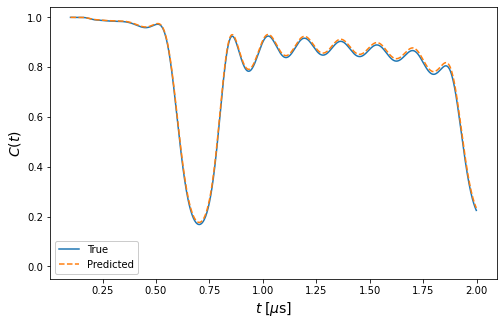

In [3]:
save = None
# save = "deliverableC.pdf"

fig = plt.figure(figsize=(8,5))

t1True, cohTrue = createSingleChi(true, returnT1=True)
t1Pred, cohPred = createSingleChi(predicted, returnT1=True)
plt.plot(t1True, cohTrue, label="True")
plt.plot(t1Pred, cohPred, '--', label="Predicted")

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
# plt.legend(bbox_to_anchor=(0.43, 0.3), loc='upper left', ncol=1, framealpha=1)
plt.legend(loc='lower left', ncol=1, framealpha=1)
plt.xlabel(r'$t \; [\mu{\rm s}]$',fontsize=14)
plt.ylabel(r'$C(t)$',fontsize=14)
plt.ylim(bottom=-0.05)
# plt.title("")
plt.show()

if not save is None:
    os.makedirs("img", exist_ok=True)
    fig.savefig('img/{}'.format(save), bbox_inches = 'tight')#, pad_inches = 0)
    print("Saved in 'img/{}'".format(save))

# $S(\omega)$

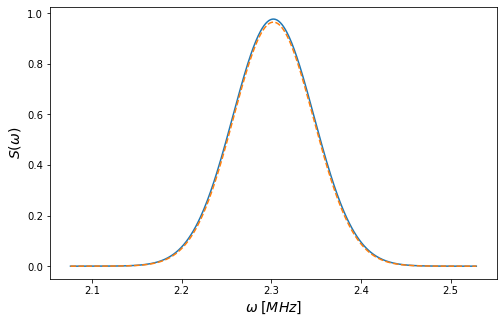

In [4]:
save = None
# save = "deliverableS.pdf"

fig = plt.figure(figsize=(8,5))

def funcGauss(x,y0, a,xc,w):
    return y0+a*np.exp(-0.5*((x-2*np.pi*xc)/(2*np.pi*w))**2) #I included a couple of 2*np.pi to convert \nu->

def funcNoise(x,y0,a1,x1,w1): # ,a2,x2,w2 ,a3,x3,w3 ,a4,x4,w4):
    return y0 + funcGauss(x,0,a1,x1,w1) #+ funcGauss(x,0,a2,x2,w2) + funcGauss(x,0,a3,x3,w3) + funcGauss(x,0,a4,x4,w4)

y0True, aTrue, BTrue, w1True, nNTrue = true
y0Pred, aPred, BPred, w1Pred, nNPred = predicted

γ=1.0705e-3 # C-13 nuclear spin gyromagnetic ratio

omega2 = 2*np.pi*np.linspace(γ*BTrue-5*w1True, γ*BTrue+5*w1True,500)
# omega2 = 2*np.pi*np.linspace(0.001, 8.5, 100000)

νlTrue = BTrue*γ # B*\gamma [MHZ]
para_ATrue=np.array([0.0, aTrue,νlTrue,w1True]) # [offset, amplitude, center, width] All in MHz
plt.plot(omega2,funcNoise(omega2,*para_ATrue))#,':.')

νlPred = BPred*γ # B*\gamma [MHZ]
para_APred=np.array([0.0, aPred,νlPred,w1Pred]) # [offset, amplitude, center, width] All in MHz
plt.plot(omega2,funcNoise(omega2,*para_APred), '--')#,':.')
plt.xlabel(r'$\omega \; [MHz]$',fontsize=14)
plt.ylabel(r'$S(\omega)$',fontsize=14)

if not save is None:
    os.makedirs("img", exist_ok=True)
    fig.savefig('img/{}'.format(save), bbox_inches = 'tight')#, pad_inches = 0)
    print("Saved in 'img/{}'".format(save))

# Both

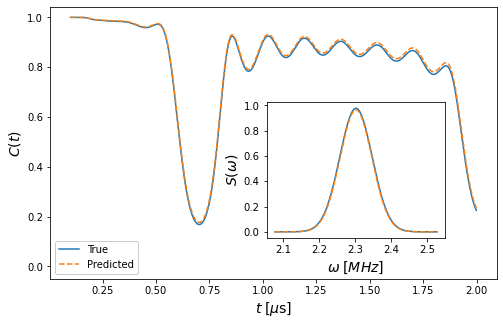

Saved in 'img/deliverable.pdf'


In [15]:
# save = None
save = "deliverable.pdf"

fig, ax1 = plt.subplots(figsize=(8,5))

# C
t1True, cohTrue = createSingleChi(true, returnT1=True)
t1Pred, cohPred = createSingleChi(predicted, returnT1=True)
ax1.plot(t1True, cohTrue, label="True")
ax1.plot(t1Pred, cohPred, '--', label="Predicted")

# ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
# ax1.legend(bbox_to_anchor=(0.43, 0.3), loc='upper left', ncol=1, framealpha=1)
ax1.legend(loc='lower left', ncol=1, framealpha=1)
ax1.set_xlabel(r'$t \; [\mu{\rm s}]$',fontsize=14)
ax1.set_ylabel(r'$C(t)$',fontsize=14)
ax1.set_ylim(bottom=-0.05)
# ax1.title("")

# S
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
# ip = InsetPosition(ax1, [0.51,0.15,0.45,0.5])
ip = InsetPosition(ax1, [0.485,0.15,0.4,0.5])
ax2.set_axes_locator(ip)

def funcGauss(x,y0, a,xc,w):
    return y0+a*np.exp(-0.5*((x-2*np.pi*xc)/(2*np.pi*w))**2) #I included a couple of 2*np.pi to convert \nu->

def funcNoise(x,y0,a1,x1,w1): # ,a2,x2,w2 ,a3,x3,w3 ,a4,x4,w4):
    return y0 + funcGauss(x,0,a1,x1,w1) #+ funcGauss(x,0,a2,x2,w2) + funcGauss(x,0,a3,x3,w3) + funcGauss(x,0,a4,x4,w4)

y0True, aTrue, BTrue, w1True, nNTrue = true
y0Pred, aPred, BPred, w1Pred, nNPred = predicted

γ=1.0705e-3 # C-13 nuclear spin gyromagnetic ratio

omega2 = 2*np.pi*np.linspace(γ*BTrue-5*w1True, γ*BTrue+5*w1True,500)
# omega2 = 2*np.pi*np.linspace(0.001, 8.5, 100000)

νlTrue = BTrue*γ # B*\gamma [MHZ]
para_ATrue=np.array([0.0, aTrue,νlTrue,w1True]) # [offset, amplitude, center, width] All in MHz
ax2.plot(omega2,funcNoise(omega2,*para_ATrue))#,':.')

νlPred = BPred*γ # B*\gamma [MHZ]
para_APred=np.array([0.0, aPred,νlPred,w1Pred]) # [offset, amplitude, center, width] All in MHz
ax2.plot(omega2,funcNoise(omega2,*para_APred), '--')#,':.')
ax2.set_xlabel(r'$\omega \; [MHz]$',fontsize=14)
ax2.set_ylabel(r'$S(\omega)$',fontsize=14)

plt.show()

if not save is None:
    os.makedirs("img", exist_ok=True)
    fig.savefig('img/{}'.format(save), bbox_inches = 'tight')#, pad_inches = 0)
    print("Saved in 'img/{}'".format(save))

# MAE $C(t)$

In [6]:
np.mean(np.abs(cohTrue - cohPred))

0.0074265222047533155

# MAE $S(\omega)$

In [7]:
np.mean(np.abs(funcNoise(omega2,*para_ATrue) - funcNoise(omega2,*para_APred)))


0.006379074864322198

# MRE $C(t)$

In [8]:
np.mean(np.abs(cohTrue - cohPred)/cohTrue)


0.012327637021653041

# MRE $S(\omega)$

In [9]:
np.mean(np.abs(funcNoise(omega2,*para_ATrue) - funcNoise(omega2,*para_APred))/funcNoise(omega2,*para_ATrue))




0.11806158026596751